In [1]:
# import pandas
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
%matplotlib inline

pd.set_option('max_columns', None)

In [2]:
df = pd.read_csv("./data/flights_random_sample_400000.csv")

In [3]:
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-03-07,AA,AA,AA,311,AA,N906NN,311,13303,MIA,"Miami, FL",10529,BDL,"Hartford, CT",1940,NaN,NaN,NaN,NaN,NaN,NaN,2249,NaN,NaN,1.0,B,0.0,N,189.0,NaN,NaN,1.0,1194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-07,AA,AA,AA,332,AA,N946NN,332,12953,LGA,"New York, NY",13930,ORD,"Chicago, IL",1330,NaN,NaN,NaN,NaN,NaN,NaN,1512,NaN,NaN,1.0,B,0.0,N,162.0,NaN,NaN,1.0,733.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-07,AA,AA,AA,465,AA,N200UU,465,14107,PHX,"Phoenix, AZ",14679,SAN,"San Diego, CA",835,833.0,-2.0,13.0,846.0,838.0,2.0,851,840.0,-11.0,0.0,NaN,0.0,N,76.0,67.0,52.0,1.0,304.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-03-07,AA,AA,AA,550,AA,N947UW,550,14100,PHL,"Philadelphia, PA",10529,BDL,"Hartford, CT",2050,NaN,NaN,NaN,NaN,NaN,NaN,2156,NaN,NaN,1.0,B,0.0,N,66.0,NaN,NaN,1.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-03-07,AA,AA,AA,591,AA,N833AW,591,11057,CLT,"Charlotte, NC",11278,DCA,"Washington, DC",1431,1537.0,66.0,16.0,1553.0,1648.0,3.0,1559,1651.0,52.0,0.0,NaN,0.0,N,88.0,74.0,55.0,1.0,331.0,52.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,2018-03-07,UA,UA_CODESHARE,UA,6215,YV,N88335,6215,14570,RNO,"Reno, NV",12266,IAH,"Houston, TX",1245,1256.0,11.0,13.0,1309.0,1817.0,16.0,1825,1833.0,8.0,0.0,NaN,0.0,N,220.0,217.0,188.0,1.0,1530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397920,2018-03-07,AA,AA_CODESHARE,AA,4441,YX,NaN,4441,14100,PHL,"Philadelphia, PA",11278,DCA,"Washington, DC",2110,NaN,NaN,NaN,NaN,NaN,NaN,2218,NaN,NaN,1.0,B,0.0,N,68.0,NaN,NaN,1.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397921,2018-03-07,AA,AA_CODESHARE,AA,4640,YX,N417YX,4640,13303,MIA,"Miami, FL",10397,ATL,"Atlanta, GA",1607,1555.0,-12.0,16.0,1611.0,1744.0,11.0,1815,1755.0,-20.0,0.0,NaN,0.0,N,128.0,120.0,93.0,1.0,594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397922,2018-03-07,AA,AA_CODESHARE,AA,4734,YX,N433YX,4734,14122,PIT,"Pittsburgh, PA",13303,MIA,"Miami, FL",1900,1855.0,-5.0,12.0,1907.0,2128.0,9.0,2154,2137.0,-17.0,0.0,NaN,0.0,N,174.0,162.0,141.0,1.0,1013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['mkt_carrier'].unique()

array(['AA', 'AS', 'DL', 'HA', 'F9', 'B6', 'UA', 'G4', 'NK', 'WN', 'VX'],
      dtype=object)

### Create the columns 'year', 'month', 'day' separating the 'fl_date' column and after that conert it back to a datetime format

In [5]:
df[["year", "month" ,"day"]] = df["fl_date"].str.split("-", expand = True)

In [6]:
df1 = df.pop('year')
df2 = df.pop('month')
df3 = df.pop('day')
df.insert(1, "year", df1)
df.insert(2, "month", df2)
df.insert(3, "day", df3)

In [7]:
df['date'] = pd.to_datetime(df[['year','month', 'day']])
df.drop(['fl_date'])

KeyError: "['fl_date'] not found in axis"

In [8]:
df

,fl_date,year,month,day,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,date
0,2018-03-07,2018,03,07,AA,AA,AA,311,AA,N906NN,311,13303,MIA,"Miami, FL",10529,BDL,"Hartford, CT",1940,NaN,NaN,NaN,NaN,NaN,NaN,2249,NaN,NaN,1.0,B,0.0,N,189.0,NaN,NaN,1.0,1194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
1,2018-03-07,2018,03,07,AA,AA,AA,332,AA,N946NN,332,12953,LGA,"New York, NY",13930,ORD,"Chicago, IL",1330,NaN,NaN,NaN,NaN,NaN,NaN,1512,NaN,NaN,1.0,B,0.0,N,162.0,NaN,NaN,1.0,733.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
2,2018-03-07,2018,03,07,AA,AA,AA,465,AA,N200UU,465,14107,PHX,"Phoenix, AZ",14679,SAN,"San Diego, CA",835,833.0,-2.0,13.0,846.0,838.0,2.0,851,840.0,-11.0,0.0,NaN,0.0,N,76.0,67.0,52.0,1.0,304.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
3,2018-03-07,2018,03,07,AA,AA,AA,550,AA,N947UW,550,14100,PHL,"Philadelphia, PA",10529,BDL,"Hartford, CT",2050,NaN,NaN,NaN,NaN,NaN,NaN,2156,NaN,NaN,1.0,B,0.0,N,66.0,NaN,NaN,1.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
4,2018-03-07,2018,03,07,AA,AA,AA,591,AA,N833AW,591,11057,CLT,"Charlotte, NC",11278,DCA,"Washington, DC",1431,1537.0,66.0,16.0,1553.0,1648.0,3.0,1559,1651.0,52.0,0.0,NaN,0.0,N,88.0,74.0,55.0,1.0,331.0,52.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2018-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,2018-03-07,2018,03,07,UA,UA_CODESHARE,UA,6215,YV,N88335,6215,14570,RNO,"Reno, NV",12266,IAH,"Houston, TX",1245,1256.0,11.0,13.0,1309.0,1817.0,16.0,1825,1833.0,8.0,0.0,NaN,0.0,N,220.0,217.0,188.0,1.0,1530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
397920,2018-03-07,2018,03,07,AA,AA_CODESHARE,AA,4441,YX,NaN,4441,14100,PHL,"Philadelphia, PA",11278,DCA,"Washington, DC",2110,NaN,NaN,NaN,NaN,NaN,NaN,2218,NaN,NaN,1.0,B,0.0,N,68.0,NaN,NaN,1.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
397921,2018-03-07,2018,03,07,AA,AA_CODESHARE,AA,4640,YX,N417YX,4640,13303,MIA,"Miami, FL",10397,ATL,"Atlanta, GA",1607,1555.0,-12.0,16.0,1611.0,1744.0,11.0,1815,1755.0,-20.0,0.0,NaN,0.0,N,128.0,120.0,93.0,1.0,594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
397922,2018-03-07,2018,03,07,AA,AA_CODESHARE,AA,4734,YX,N433YX,4734,14122,PIT,"Pittsburgh, PA",13303,MIA,"Miami, FL",1900,1855.0,-5.0,12.0,1907.0,2128.0,9.0,2154,2137.0,-17.0,0.0,NaN,0.0,N,174.0,162.0,141.0,1.0,1013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07


In [9]:
import datetime, warnings, scipy 

#_________________________________________________________
# Function that convert the 'HHMM' string to datetime.time "1940 -> 19:40:00"
def time_format(chain):
    if pd.isnull(chain):
        return np.nan
    else:
        if chain == 2400: chain = 0
        chain = "{0:04d}".format(int(chain))
        time = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return time
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_time(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format "1940 -> 2018-01-01 19:40:00"
def create_flight_time(df, col):    
    list1 = []
    for index, cols in df[['date', col]].iterrows():    
        if pd.isnull(cols[1]):
            list1.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            list1.append(combine_date_time(cols))
        else:
            cols[1] = format_heure(cols[1])
            list1.append(combine_date_time(cols))
    return pd.Series(list1)

In [10]:
# df['crs_dep_time'] = create_flight_time(df, 'crs_dep_time')

In [11]:
df['crs_dep_time'] = df['crs_dep_time'].apply(time_format)

NameError: name 'chaine' is not defined

In [12]:
df['dep_time'] = df['dep_time'].apply(time_format)

NameError: name 'chaine' is not defined

In [13]:
df['crs_arr_time'] = df['crs_arr_time'].apply(time_format)

NameError: name 'chaine' is not defined

In [14]:
df['arr_time'] = df['arr_time'].apply(time_format)

NameError: name 'chaine' is not defined

In [15]:
df

,fl_date,year,month,day,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,date
0,2018-03-07,2018,03,07,AA,AA,AA,311,AA,N906NN,311,13303,MIA,"Miami, FL",10529,BDL,"Hartford, CT",1940,NaN,NaN,NaN,NaN,NaN,NaN,2249,NaN,NaN,1.0,B,0.0,N,189.0,NaN,NaN,1.0,1194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
1,2018-03-07,2018,03,07,AA,AA,AA,332,AA,N946NN,332,12953,LGA,"New York, NY",13930,ORD,"Chicago, IL",1330,NaN,NaN,NaN,NaN,NaN,NaN,1512,NaN,NaN,1.0,B,0.0,N,162.0,NaN,NaN,1.0,733.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
2,2018-03-07,2018,03,07,AA,AA,AA,465,AA,N200UU,465,14107,PHX,"Phoenix, AZ",14679,SAN,"San Diego, CA",835,833.0,-2.0,13.0,846.0,838.0,2.0,851,840.0,-11.0,0.0,NaN,0.0,N,76.0,67.0,52.0,1.0,304.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
3,2018-03-07,2018,03,07,AA,AA,AA,550,AA,N947UW,550,14100,PHL,"Philadelphia, PA",10529,BDL,"Hartford, CT",2050,NaN,NaN,NaN,NaN,NaN,NaN,2156,NaN,NaN,1.0,B,0.0,N,66.0,NaN,NaN,1.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
4,2018-03-07,2018,03,07,AA,AA,AA,591,AA,N833AW,591,11057,CLT,"Charlotte, NC",11278,DCA,"Washington, DC",1431,1537.0,66.0,16.0,1553.0,1648.0,3.0,1559,1651.0,52.0,0.0,NaN,0.0,N,88.0,74.0,55.0,1.0,331.0,52.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2018-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,2018-03-07,2018,03,07,UA,UA_CODESHARE,UA,6215,YV,N88335,6215,14570,RNO,"Reno, NV",12266,IAH,"Houston, TX",1245,1256.0,11.0,13.0,1309.0,1817.0,16.0,1825,1833.0,8.0,0.0,NaN,0.0,N,220.0,217.0,188.0,1.0,1530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
397920,2018-03-07,2018,03,07,AA,AA_CODESHARE,AA,4441,YX,NaN,4441,14100,PHL,"Philadelphia, PA",11278,DCA,"Washington, DC",2110,NaN,NaN,NaN,NaN,NaN,NaN,2218,NaN,NaN,1.0,B,0.0,N,68.0,NaN,NaN,1.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
397921,2018-03-07,2018,03,07,AA,AA_CODESHARE,AA,4640,YX,N417YX,4640,13303,MIA,"Miami, FL",10397,ATL,"Atlanta, GA",1607,1555.0,-12.0,16.0,1611.0,1744.0,11.0,1815,1755.0,-20.0,0.0,NaN,0.0,N,128.0,120.0,93.0,1.0,594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07
397922,2018-03-07,2018,03,07,AA,AA_CODESHARE,AA,4734,YX,N433YX,4734,14122,PIT,"Pittsburgh, PA",13303,MIA,"Miami, FL",1900,1855.0,-5.0,12.0,1907.0,2128.0,9.0,2154,2137.0,-17.0,0.0,NaN,0.0,N,174.0,162.0,141.0,1.0,1013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-07


In [16]:
variables_to_remove = ['taxi_out', 'taxi_in', 'wheels_on', 'wheels_off', 'year','month','day','date', 'nas_delay', 'security_delay', 'carrier_delay', 'late_aircraft_delay',
                       'weather_delay', 'diverted', 'cancelled', 'cancellation_code','mkt_carrier_fl_num', 'tail_num', 'air_time', 'mkt_unique_carrier', 'branded_code_share', 
                       'mkt_carrier', 'op_carrier_fl_num', 'dup', 'flights', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name']

In [17]:
df.drop(variables_to_remove, axis = 1, inplace = True)

In [18]:
df = df[['op_unique_carrier', 'origin_city_name', 'origin', 'origin_airport_id', 'dest_city_name', 'dest', 'dest_airport_id', 'crs_dep_time', 'dep_time', 'dep_delay', 'crs_arr_time', 'arr_time', 'arr_delay', 'crs_elapsed_time', 'actual_elapsed_time']]

In [19]:
df

,op_unique_carrier,origin_city_name,origin,origin_airport_id,dest_city_name,dest,dest_airport_id,crs_dep_time,dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time
0,AA,"Miami, FL",MIA,13303,"Hartford, CT",BDL,10529,1940,NaN,NaN,2249,NaN,NaN,189.0,NaN
1,AA,"New York, NY",LGA,12953,"Chicago, IL",ORD,13930,1330,NaN,NaN,1512,NaN,NaN,162.0,NaN
2,AA,"Phoenix, AZ",PHX,14107,"San Diego, CA",SAN,14679,835,833.0,-2.0,851,840.0,-11.0,76.0,67.0
3,AA,"Philadelphia, PA",PHL,14100,"Hartford, CT",BDL,10529,2050,NaN,NaN,2156,NaN,NaN,66.0,NaN
4,AA,"Charlotte, NC",CLT,11057,"Washington, DC",DCA,11278,1431,1537.0,66.0,1559,1651.0,52.0,88.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,YV,"Reno, NV",RNO,14570,"Houston, TX",IAH,12266,1245,1256.0,11.0,1825,1833.0,8.0,220.0,217.0
397920,YX,"Philadelphia, PA",PHL,14100,"Washington, DC",DCA,11278,2110,NaN,NaN,2218,NaN,NaN,68.0,NaN
397921,YX,"Miami, FL",MIA,13303,"Atlanta, GA",ATL,10397,1607,1555.0,-12.0,1815,1755.0,-20.0,128.0,120.0
397922,YX,"Pittsburgh, PA",PIT,14122,"Miami, FL",MIA,13303,1900,1855.0,-5.0,2154,2137.0,-17.0,174.0,162.0


In [20]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,arr_delay,7763,98.049125
1,actual_elapsed_time,7707,98.063198
2,arr_time,6825,98.284848
3,dep_delay,6538,98.356973
4,dep_time,6420,98.386627
5,op_unique_carrier,0,100.000000
6,origin_city_name,0,100.000000
7,origin,0,100.000000
8,origin_airport_id,0,100.000000
9,dest_city_name,0,100.000000


In [21]:
df.dropna(inplace = True)

<ipython-input-21-d1ada024d2eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [22]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,op_unique_carrier,0,100.0
1,origin_city_name,0,100.0
2,origin,0,100.0
3,origin_airport_id,0,100.0
4,dest_city_name,0,100.0
5,dest,0,100.0
6,dest_airport_id,0,100.0
7,crs_dep_time,0,100.0
8,dep_time,0,100.0
9,dep_delay,0,100.0


In [23]:
df

,op_unique_carrier,origin_city_name,origin,origin_airport_id,dest_city_name,dest,dest_airport_id,crs_dep_time,dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time
2,AA,"Phoenix, AZ",PHX,14107,"San Diego, CA",SAN,14679,835,833.0,-2.0,851,840.0,-11.0,76.0,67.0
4,AA,"Charlotte, NC",CLT,11057,"Washington, DC",DCA,11278,1431,1537.0,66.0,1559,1651.0,52.0,88.0,74.0
5,AA,"Fort Lauderdale, FL",FLL,11697,"Charlotte, NC",CLT,11057,603,557.0,-6.0,809,805.0,-4.0,126.0,128.0
6,AA,"Charlotte, NC",CLT,11057,"Boston, MA",BOS,10721,1135,1129.0,-6.0,1352,1324.0,-28.0,137.0,115.0
7,AA,"Charlotte, NC",CLT,11057,"Tulsa, OK",TUL,15370,1820,1812.0,-8.0,2002,1942.0,-20.0,162.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397918,YV,"Cincinnati, OH",CVG,11193,"Washington, DC",IAD,12264,1450,1445.0,-5.0,1617,1608.0,-9.0,87.0,83.0
397919,YV,"Reno, NV",RNO,14570,"Houston, TX",IAH,12266,1245,1256.0,11.0,1825,1833.0,8.0,220.0,217.0
397921,YX,"Miami, FL",MIA,13303,"Atlanta, GA",ATL,10397,1607,1555.0,-12.0,1815,1755.0,-20.0,128.0,120.0
397922,YX,"Pittsburgh, PA",PIT,14122,"Miami, FL",MIA,13303,1900,1855.0,-5.0,2154,2137.0,-17.0,174.0,162.0


In [24]:
airlines_names = pd.read_csv('airlines.csv')
airlines_names

,ITA_code,airline
0,AA,American Airlines
1,PT,Capital Cargo International Airlines
2,CP,Canadian Airlines
3,AS,Alaska Airlines
4,DL,Delta Airlines
5,HA,Hawaiian Airlines
6,F9,Frontier Airlines Inc.
7,9E,Endeavor Air
8,B6,JetBlue Airways
9,C5,CommutAir


In [25]:
abbr_companies = airlines_names.set_index('ITA_code')['airline'].to_dict()

2.1 Basic statistical description of airlines:
- As a first step, I consider all the flights from all carriers. Here, the aim is to classify the airlines with respect to their punctuality and for that purpose, I compute a few basic statisticial parameters:

In [26]:
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['dep_delay'].groupby(df['op_unique_carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
op_unique_carrier,,,,
9K,-25.0,20.0,45.0,-6.222222
KS,-21.0,212.0,71.0,29.591549
EM,-32.0,401.0,402.0,6.798507
VX,-22.0,194.0,430.0,6.469767
C5,-23.0,1272.0,2605.0,27.233397
AX,-23.0,1443.0,3793.0,17.732402
G7,-21.0,1275.0,3992.0,14.950401
HA,-24.0,872.0,4148.0,0.921649
CP,-339.0,1020.0,4772.0,10.024099


<ipython-input-27-9ff6b72ece4f>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


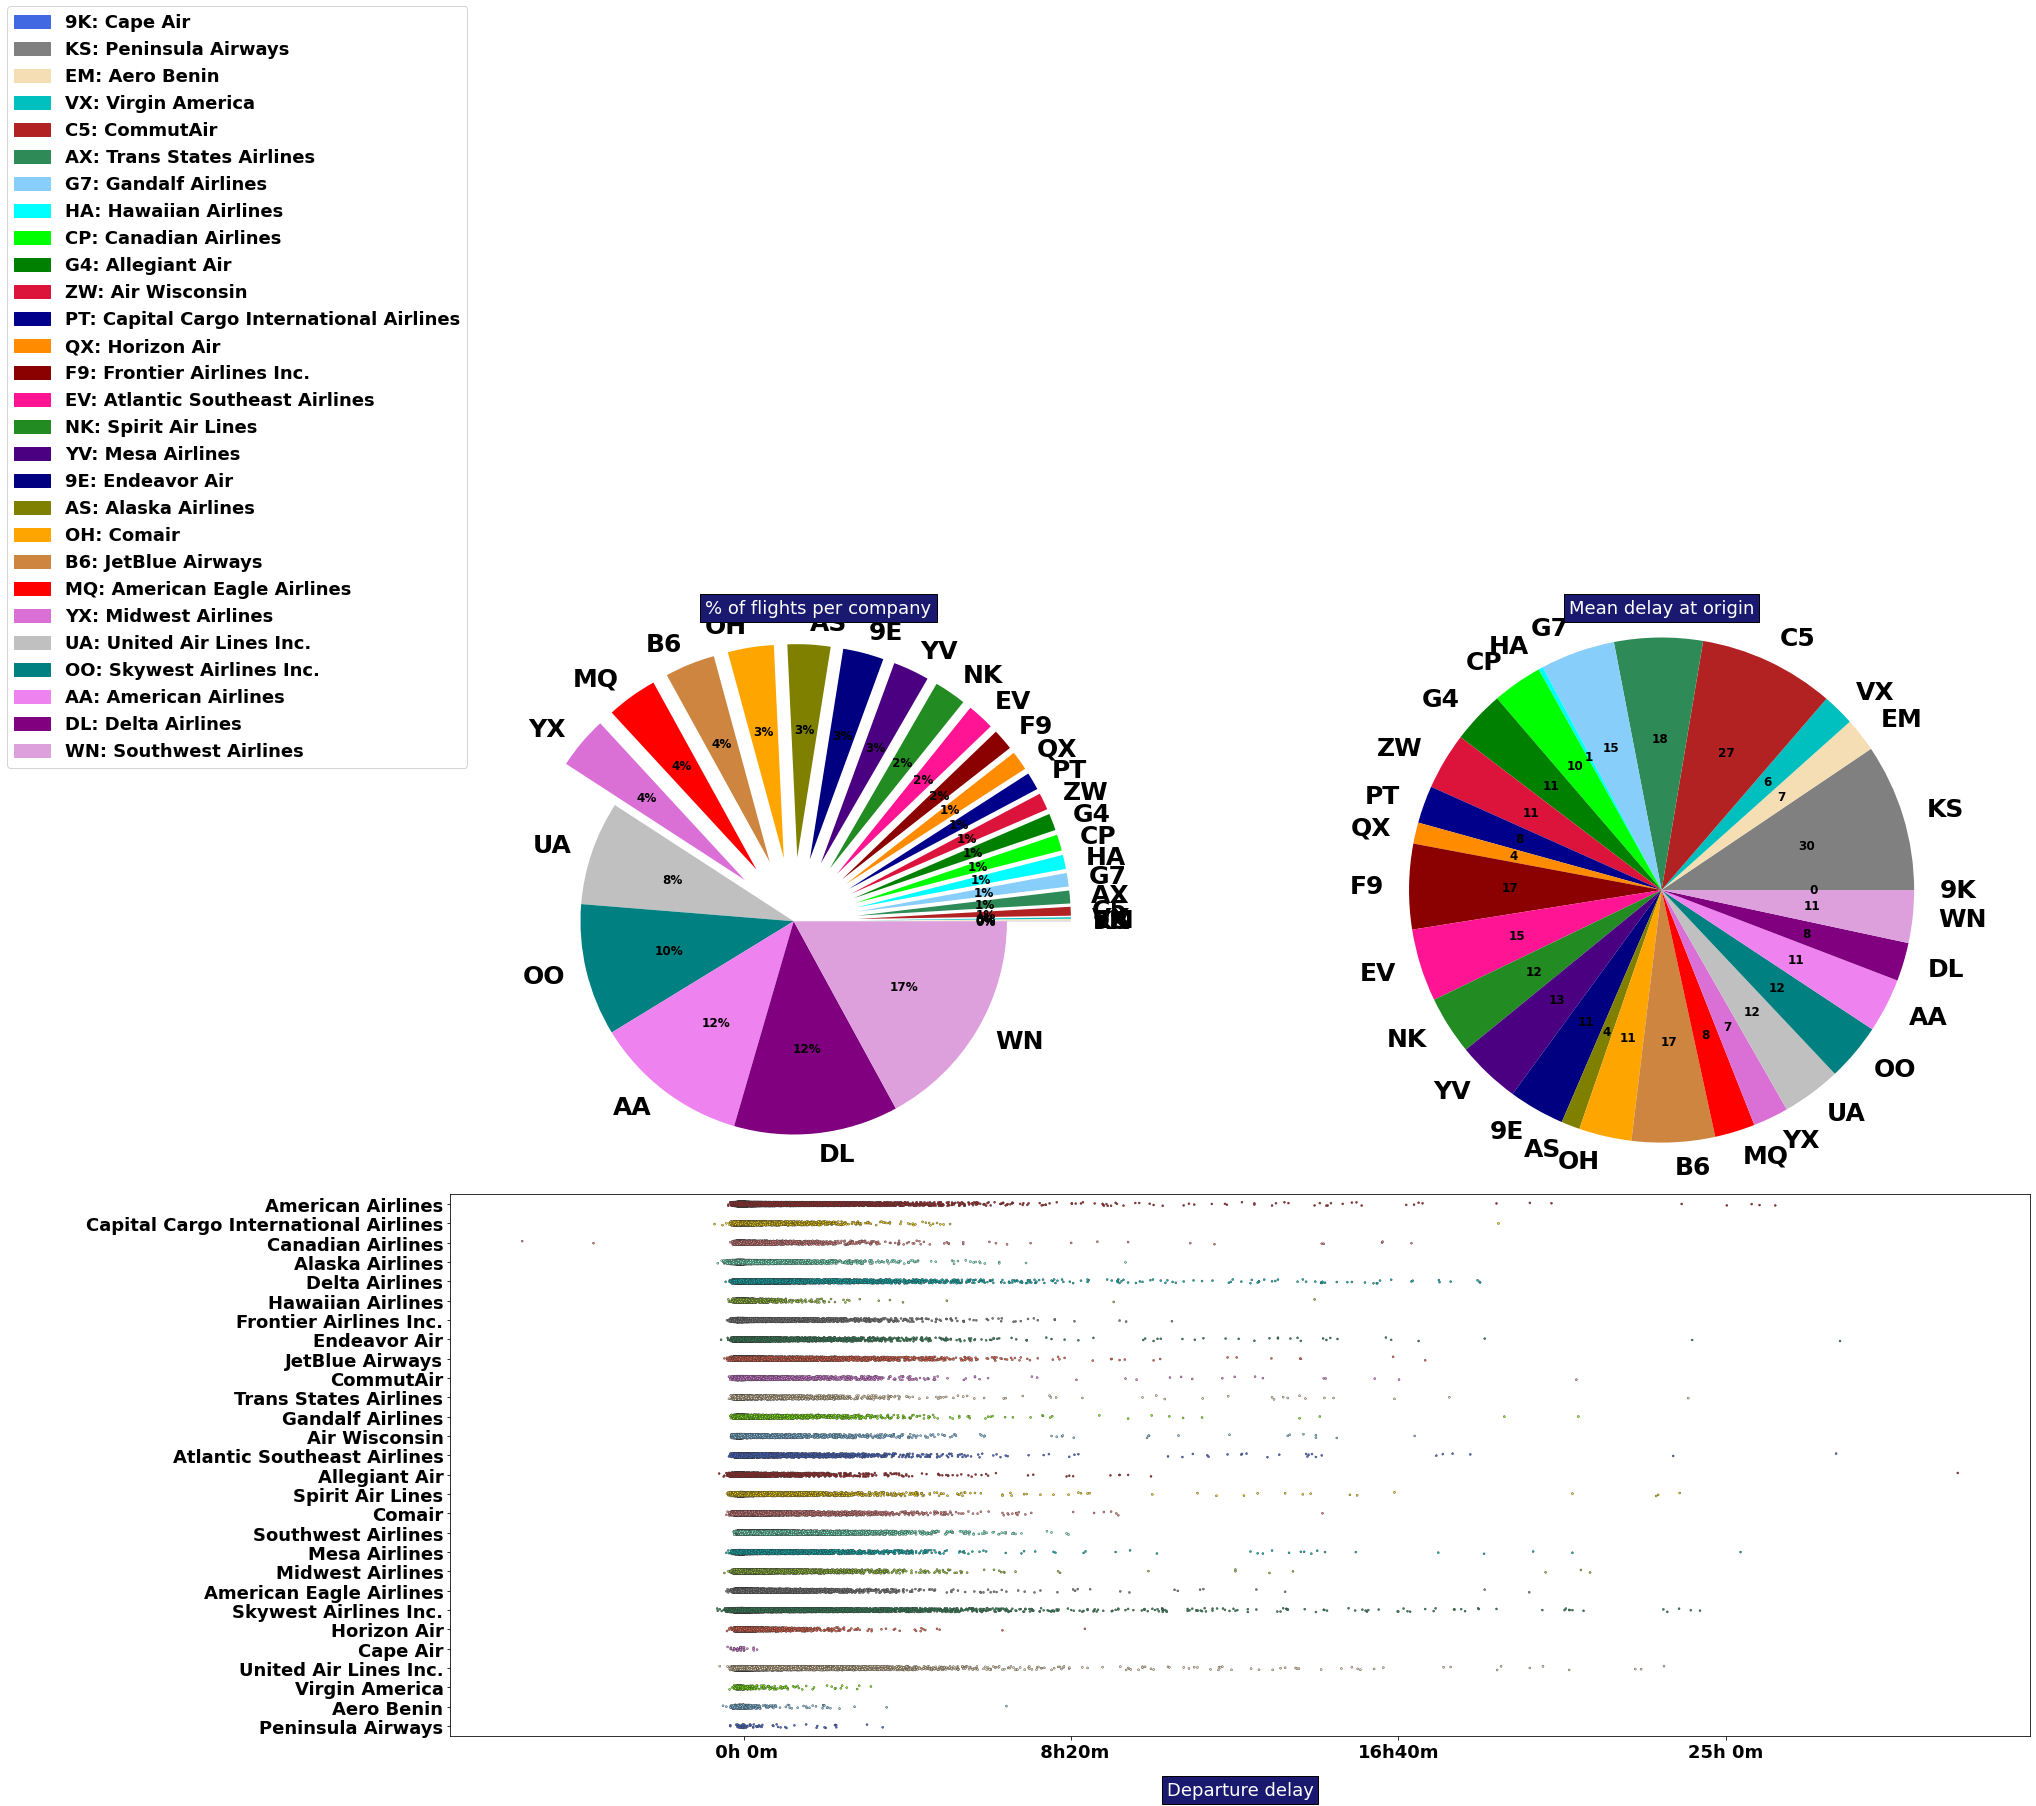

In [27]:
import matplotlib.patches as mpatches
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

font = {'family' : 'normal', 'weight' : 'bold', 'size'  : 12}
mpl.rc('font', **font)

#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = df.loc[:, ['op_unique_carrier', 'dep_delay']]
df2['op_unique_carrier'] = df2['op_unique_carrier'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue','grey','wheat','c','firebrick','seagreen','lightskyblue','aqua','lime','green','crimson','darkblue',
          'darkorange','darkred','deeppink','forestgreen','indigo','navy','olive','orange','peru','red','orchid','silver',
          'teal','violet','purple','plum']
#___________________________________
fig = plt.figure(1, figsize=(28,28))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(25)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 18, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(25)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="op_unique_carrier", x="dep_delay", size = 2, palette = colors,
                    data=df2, linewidth = 0.4,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=18)
plt.setp(ax3.get_yticklabels(), fontsize=18)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 

<ipython-input-28-c73d575f60af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delay_level'] = df['dep_delay'].apply(delay_type)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


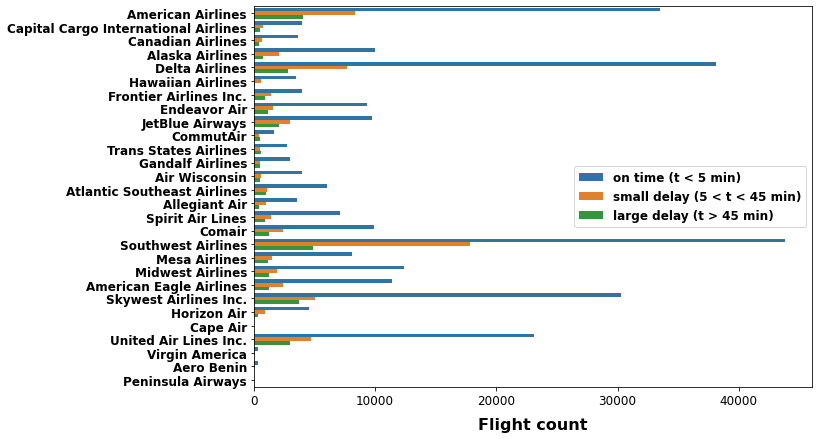

In [28]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['delay_level'] = df['dep_delay'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="op_unique_carrier", hue='delay_level', data=df)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

<ipython-input-29-f249094f6856>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['' for x in ax.get_xticks()])
<ipython-input-29-f249094f6856>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['' for x in ax.get_xticks()])
<ipython-input-29-f249094f6856>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['' for x in ax.get_xticks()])
<ipython-input-29-f249094f6856>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['' for x in ax.get_xticks()])
<ipython-input-29-f249094f6856>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['' for x in ax.get_xticks()])
<ipython-input-29-f249094f6856>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['' for x in ax.get_xticks()])
<ipython-input-29-f249

ValueError: num must be 1 <= num <= 15, not 16

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


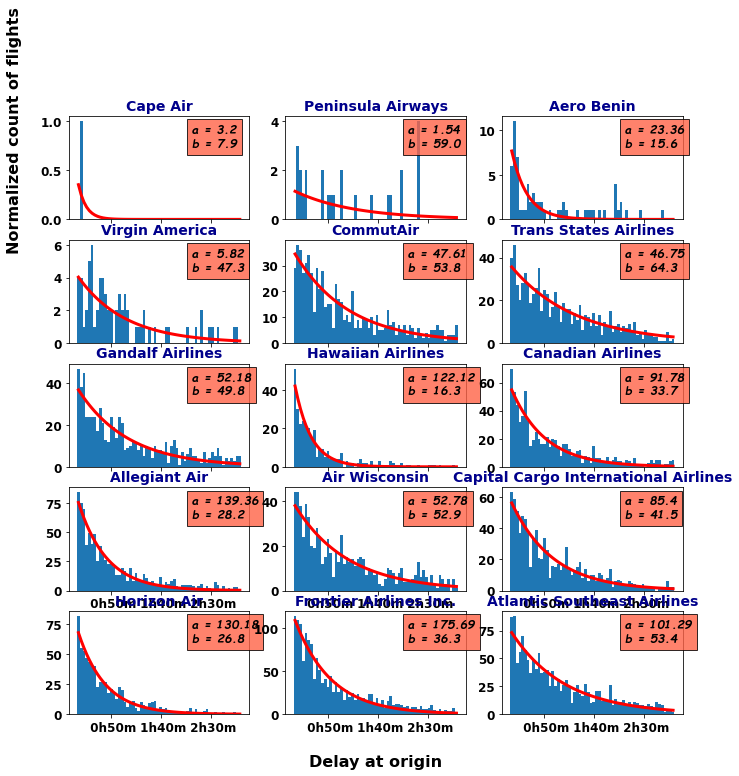

In [29]:

from scipy.optimize import curve_fit
#___________________________________________
# Model function used to fit the histograms
def func(x, a, b):
    return a * np.exp(-x/b)
#-------------------------------------------
points = [] ; label_company = []
fig = plt.figure(1, figsize=(11,11))
i = 0
for carrier_name in [abbr_companies[x] for x in global_stats.index]:
    i += 1
    ax = fig.add_subplot(5,3,i)    
    #_________________________
    # Fit of the distribution
    n, bins, patches = plt.hist(x = df2[df2['op_unique_carrier']==carrier_name]['dep_delay'],
                                range = (16,180), bins= 60)
    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])    
    popt, pcov = curve_fit(func, bin_centers, n, p0 = [1, 2])
    #___________________________
    # bookeeping of the results
    points.append(popt)
    label_company.append(carrier_name)
    #______________________
    # draw the fit curve
    plt.plot(bin_centers, func(bin_centers, *popt), 'r-', linewidth=3)    
    #_____________________________________
    # define tick labels for each subplot
    if i < 10:
        ax.set_xticklabels(['' for x in ax.get_xticks()])
    else:
        ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                            for x in ax.get_xticks()])
    #______________
    # subplot title
    plt.title(carrier_name, fontsize = 14, fontweight = 'bold', color = 'darkblue')
    #____________
    # axes labels 
    if i == 4:
        ax.text(-0.3,0.9,'Normalized count of flights', fontsize=16, rotation=90,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    if i == 14:
        ax.text( 0.5, -0.5 ,'Delay at origin', fontsize=16, rotation=0,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    #___________________________________________
    # Legend: values of the a and b coefficients
    ax.text(0.68, 0.7, 'a = {}\nb = {}'.format(round(popt[0],2), round(popt[1],1)),
            style='italic', transform=ax.transAxes, fontsize = 12, family='fantasy',
            bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})
    
plt.tight_layout()

In [ ]:
df

In [ ]:
def get_flight_delays(df, carrier, id_airport, extrem_values = False):
    df2 = df[(df['op_unique_carrier'] == carrier) & (df['origin'] == id_airport)]
    
    #_______________________________________
    # remove extreme values before fitting
    if extrem_values:
        df2['dep_delay'] = df2['dep_delay'].apply(lambda x:x if x < 60 else np.nan)
        df2.dropna(how = 'any')
    
    #__________________________________
    # Conversion: date + time -> time
    df2.sort_values('crs_dep_time', inplace = True)
    df2['dep_time'] =  df2['crs_dep_time'].apply(lambda x:x.time())
    
    #___________________________________________________________________
    # grouping of flights by departure time and averaging
    test2 = df2['dep_delay'].groupby(df2['dep_time']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    
    #___________________________________
    # converting time to seconds
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    test2.reset_index(inplace=True)
    test2['dep_time_minutes'] = test2['dep_time'].apply(fct)
    return test2

In [ ]:
df

In [ ]:
df

### Now we check for all missing values and NaN values on the entire data set

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df

### Drop the columns with delay values wich we are not supposed to use and also other columns with not usefull information

In [ ]:
df2 = df.drop(['cancellation_code', 'carrier_delay', 'weather_delay', 'nas_delay', 
          'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name'], axis=1)

### Here we fill the missing values and NaN values with '0' and afterd that set an option for the notebook to show all the columns

In [ ]:
df3 = df2.fillna(0)

In [ ]:
pd.set_option('max_columns', None)

### Whe check for null values again and make sure we dont have any more

In [ ]:
percent_missing = df3.isnull().sum() * 100 / len(df3)
missing_value_df = pd.DataFrame({'column_name': df3.columns,
                                 'percent_missing': percent_missing})
missing_value_df

### Here we drop more columns and here are the reasons for each:

- origin - info available in origin_airport_id
- origin_city_name - info available in origin_airport_id
- dest - info available in dest_airport_id
- dest_city_name - info available in dest_airport_id
- tail_num - all unique ID
- mkt_carrier_fl_num - all unique ID
- op_carrier_fl_num - all unique ID
- flights - just "1" values in all rows
- dup - just "N" values in all rows
- mkt_carrier - same info in mkt_unique_carrier

In [ ]:
df4 = df3.drop(['origin', 'origin_city_name', 'dest', 'dest_city_name', 'tail_num', 
                'op_carrier_fl_num', 'flights', 'dup', 'mkt_carrier', 'mkt_unique_carrier', 'mkt_carrier', 
               'branded_code_share', 'cancelled', 'diverted'], axis=1)

### Create a copy for data integrity

In [ ]:
df5 = df4.copy()
df5

### Now we build a new variable (column 'delayed') indicating whether or not flights are delayed and use it to filter and count the number o delays per each carrier

In [ ]:
df5['delayed'] = df5['arr_delay'].apply(lambda x: x > 0)

In [ ]:
delayed_flights = df5[df5['delayed'] == True] #filter to only rows where delayer == True
delayed_flights['op_unique_carrier'].value_counts() #count the number of rows for each carrier

### Now we calculate the proportion of flights that were delayed

In [ ]:
df5.groupby(['op_unique_carrier','delayed']).size().unstack()

### Here we assign the values to a new data frame "delayed_by_carrier" and add a new 'clean' index

In [ ]:
delayed_by_carrier = df5.groupby(['op_unique_carrier','delayed']).size().unstack().reset_index()
delayed_by_carrier[:5]

### Calculate a new variable "flights_count" with the total delayed and not delayed flights

In [ ]:
delayed_by_carrier['flights_count'] = (delayed_by_carrier[False] + delayed_by_carrier[True])
delayed_by_carrier[:5]

### And now we calculate the percentage of flights delayed per each carrier and sort it by 'percentage_delayed'

In [30]:
delayed_by_carrier['percentage_delayed'] = (delayed_by_carrier[True] / delayed_by_carrier['flights_count'])*100
delayed_by_carrier.sort_values('percentage_delayed', ascending=False)

NameError: name 'delayed_by_carrier' is not defined

### One option to check the mean (general idea of how many minutes flights were delayed for each airline) its to use a pivot table with the carrier and the delay. It returns the mean of the delay for each carrier 

In [31]:
df5.pivot_table(columns='op_unique_carrier', values='arr_delay', aggfunc=np.mean)

NameError: name 'df5' is not defined

### Another option to check the general stats per carrier is use the .describe() function with each carrier. In this case we check for 'WN'

In [32]:
carrier_delay_stats = df5[df5['op_unique_carrier'] == 'WN']['arr_delay']

NameError: name 'df5' is not defined

In [33]:
carrier_delay_stats.describe()

NameError: name 'carrier_delay_stats' is not defined

### Plot an histogram for the delay distribution of each carrier. We start for creating the bins for the X intervals. We use a 10 minutes interval (step=10), starting with 100 minutes early (start=-100) and ending at 200 minutes late (stop=200)

In [34]:
bin_values = np.arange(start=-100, stop=200, step=5)
bin_values

array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95,  100,  105,  110,  115,
        120,  125,  130,  135,  140,  145,  150,  155,  160,  165,  170,
        175,  180,  185,  190,  195])

### Here is the histogram for WN carrier 

In [35]:
wn_carrier = df5[df5['op_unique_carrier'] == 'WN']
wn_carrier['arr_delay'].hist(bins=bin_values, figsize=[14,6])

NameError: name 'df5' is not defined

In [36]:
# y = pd.get_dummies(df5.op_unique_carrier, prefix='carrier')
# y

In [37]:
df5

NameError: name 'df5' is not defined

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
X = df5[['year','month','day','distance','air_time', 'origin_airport_id', 'dest_airport_id', 
         'taxi_out', 'taxi_in', 'crs_elapsed_time', 'actual_elapsed_time']]

NameError: name 'df5' is not defined

In [40]:
y = df5['arr_delay']

NameError: name 'df5' is not defined

In [41]:
scaler = StandardScaler() 

In [42]:
data_scaled = scaler.fit_transform(X)

NameError: name 'X' is not defined

In [43]:
reg = LinearRegression().fit(data_scaled, y)

NameError: name 'data_scaled' is not defined

In [44]:
reg.score(data_scaled, y)

NameError: name 'reg' is not defined

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.30, random_state=1234)

NameError: name 'data_scaled' is not defined

In [46]:
y_pred = reg.predict(X_test)

NameError: name 'reg' is not defined

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: name 'y_test' is not defined

In [49]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

NameError: name 'y_test' is not defined